In [236]:
import json
import pandas as pd
import glob
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 4.5]
plt.rcParams['figure.dpi'] = 100

def load_results(instance_name):
    df = pd.concat([pd.DataFrame.from_dict([json.load(open(file))]) for file in  glob.glob(f"{instance_name}*.json")])
    df['nbIterationsCG'] = df['columnGenerationTime'].apply(lambda l: len(l) if isinstance(l, list) else 0)
    df['totalCGGenTime'] = df['columnGenerationTime'].apply(lambda l: sum(l) if isinstance(l, list) else 0)
    df['totalCGRMPTime'] = df['columnMasterSolvingTime'].apply(lambda l: sum(l) if isinstance(l, list) else 0)
    
    df['nbIterationsRG'] = df['rowGenerationTime'].apply(lambda l: len(l) if isinstance(l, list) else 0)
    df['totalRGGenTime'] = df['rowGenerationTime'].apply(lambda l: sum(l) if isinstance(l, list) else 0)
    df['totalRGRMPTime'] = df['rowMasterSolvingTime'].apply(lambda l: sum(l) if isinstance(l, list) else 0)
    df['gap'] = (df['objValue'] - df['lowerBound']) / df['lowerBound']
    return df

def plot_metrics(df):
    table = df.pivot(index='nbLicenses', values=['executionTime', 'BnBTime', 'generationTime'], columns='model')
    fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True)
    table.plot.bar(y='executionTime', ax=axes[0], title='Execution time')
    table.plot.bar(y='BnBTime', ax=axes[1], title='BnB time')
    table.plot.bar(y='generationTime', ax=axes[2], title='Generation time')
    
    table = df.pivot(index='nbLicenses', values=['gap', 'lowerBound', 'objValue'], columns='model')
    fig, axes = plt.subplots(ncols=2, sharey=True)
    table.plot.bar(y='objValue', ax=axes[0], title='Objective value')
    table.plot.bar(y='lowerBound', ax=axes[1], title='Lower bound')
    fig, ax = plt.subplots(ncols=1)
    table.plot.bar(y='gap', ax=ax, title='Gap')
    
    table = df.pivot(index='nbLicenses', values=['nbIterationsCG', 'nbIterationsRG'], columns='model')
    fig, axes = plt.subplots(ncols=2, sharey=True)
    table.plot.bar(y='nbIterationsRG', ax=axes[0], title='# rowGen iterations')
    table.plot.bar(y='nbIterationsCG', ax=axes[1], title='# colGen iterations')
    
    table = df.pivot(index='nbLicenses', values=['totalCGGenTime', 'totalRGGenTime', 'totalCGRMPTime', 'totalRGRMPTime'], columns='model')
    display(table)
    fig, axes = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(16, 9))
    #axes[0][0].set_yscale('log')
    table.plot.bar(y='totalRGGenTime', ax=axes[0][0], title='total rowGen time')
    table.plot.bar(y='totalCGGenTime', ax=axes[0][1], title='total colGen time')
    table.plot.bar(y='totalRGRMPTime', ax=axes[1][0], title='total rowRMP time')
    table.plot.bar(y='totalCGRMPTime', ax=axes[1][1], title='total colRMP time')

totalCGGenTime           totalRGGenTime           totalCGRMPTime  \
model               CGBnB    CRGBnB          CGBnB    CRGBnB          CGBnB   
nbLicenses                                                                    
1                0.000000  0.000000            0.0  0.000000       0.000000   
2                0.000000  0.298042            0.0  0.030643       0.000000   
3                0.131721  0.165834            0.0  0.021466      32.290653   
4                0.086081  0.092899            0.0  0.011376      18.677087   
5                0.041021  0.048050            0.0  0.010206       7.310967   
6                0.034996  0.047209            0.0  0.010925       6.418697   
7                0.031437  0.043529            0.0  0.009193       5.236399   
8                0.038898  0.053956            0.0  0.006628       6.436195   
9                0.001174  0.002055            0.0  0.002454       0.053611   
10               0.001406  0.002286            0.0  0.002326       0.059951   

                      totalRGRMPTime            
model          CRGBnB          CGBnB    CRGBnB  
nbLicenses                                      
1            0.000000            0.0  0.000000  
2           54.826913            0.0  5.891533  
3           26.641390            0.0  1.156103  
4            7.379243            0.0  0.342996  
5            1.166108            0.0  0.260231  
6            0.429771            0.0  0.065661  
7            0.336695            0.0  0.040032  
8            0.381507            0.0  0.026362  
9            0.007143            0.0  0.004593  
10           0.007077            0.0  0.004746

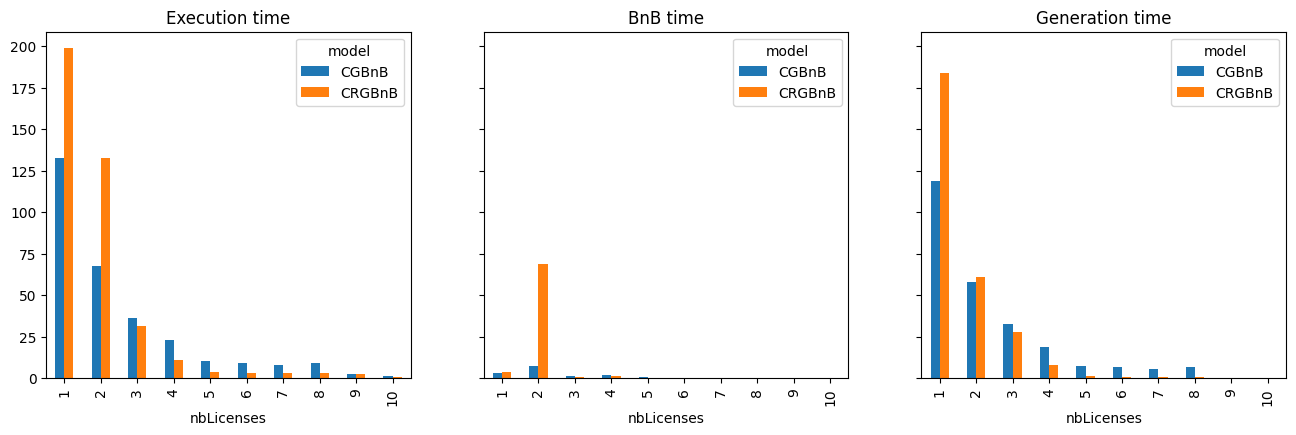

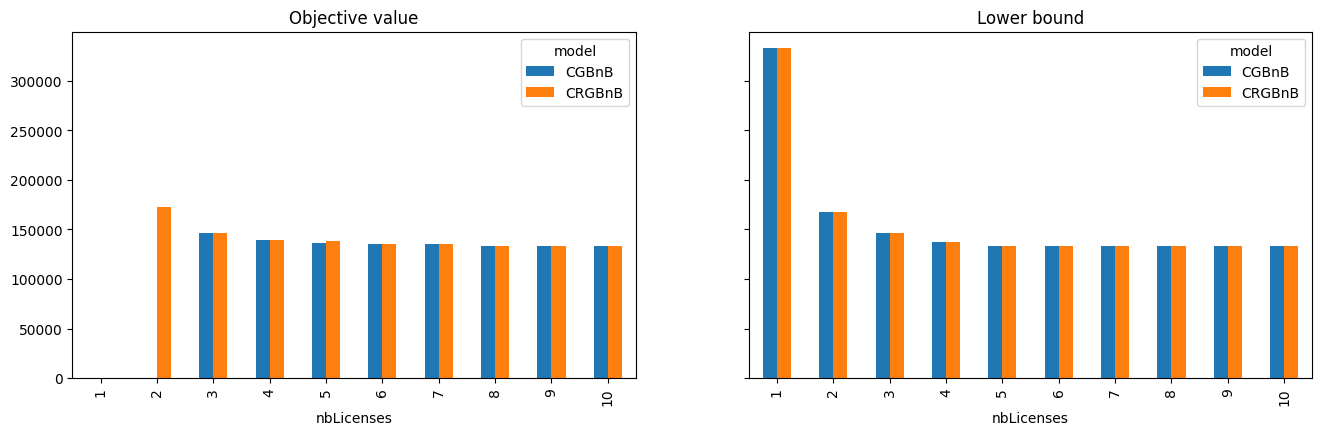

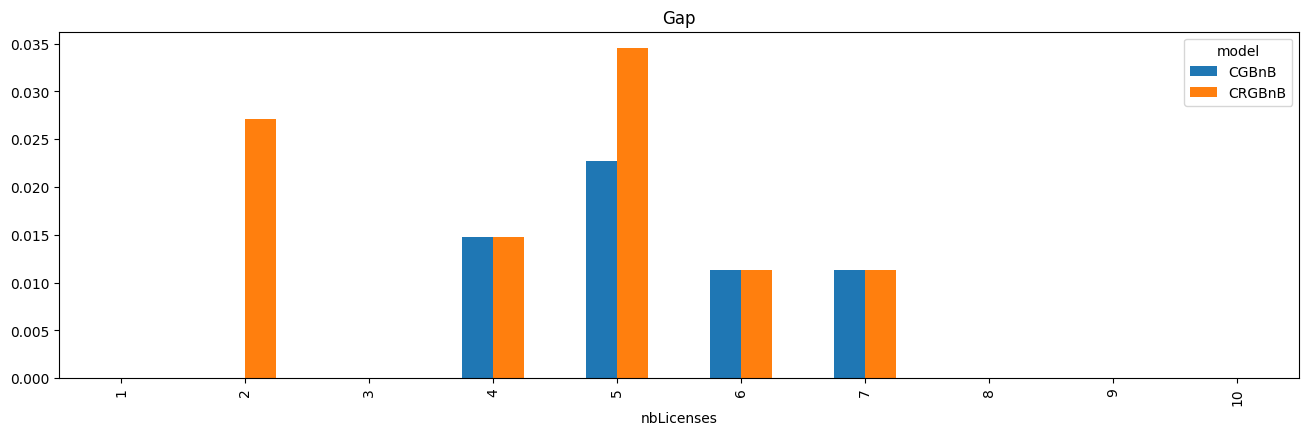

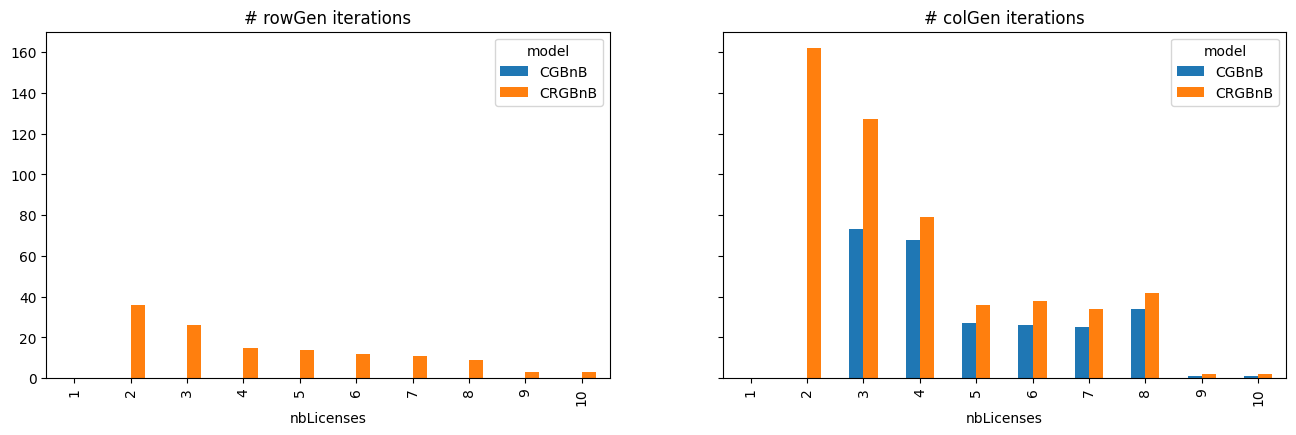

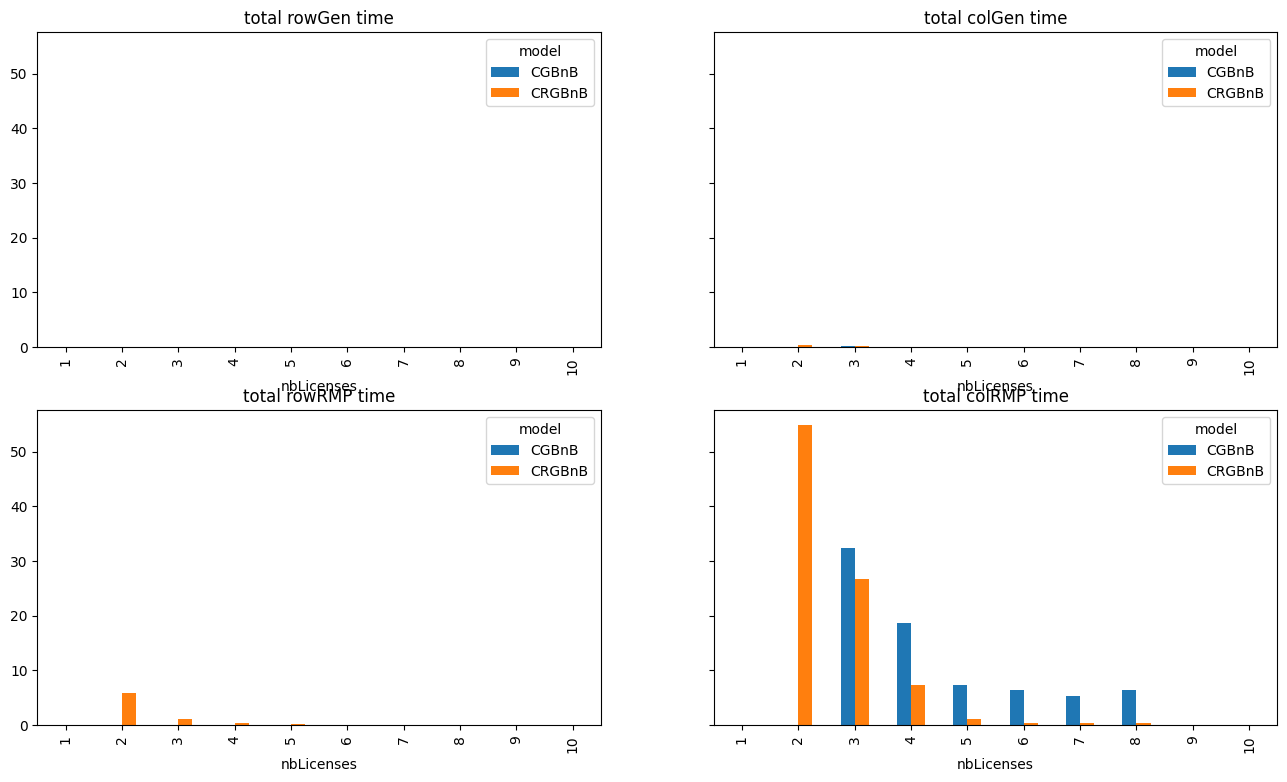

In [237]:
plot_metrics(load_results("internet2"))

In [241]:
plot_metrics(load_results("atlanta"))

KeyError: 'columnGenerationTime'